## Lab 6: Sequence Characteristics

##### Q0: What's your name?

The purpose of this exercise is to retrieve your gene's mRNA and protein sequences from Genbank and perform some (more) preliminary analysis.

Check that the fasta files containing the 5'UTR, CDS, and 3'UTR sequences of your gene (the files generated in lab exercise 4) are located in your working directory.

### 1. Identifying the GC content of regions of your mRNA.

In [1]:

from Bio import Entrez # we'll import a set of code written for querying NCBI databases using Entrez
from Bio import SeqIO # and a set of code specific for dealing with sequences

In [2]:
GI_id = "NM_000088.3" # enter the accession # or GeneID for the mRNA sequence of your gene ***as a string***

Documentation for efecth http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EFetch  

Code adapted from Biopython Tutorial, 5.3.1  Parsing GenBank records from the net

In [3]:
Entrez.email = "Andrew.judellHalf001@umb.edu" # let NCBI know who you are
handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id=GI_id) # db = database to query, rettype = retrieval type, retmode = retrieval mode 
nt_seq_record = SeqIO.read(handle, "gb") #read the contents "fetched" from NCBI
handle.close()

In [4]:
ntid = nt_seq_record.id # assign the accession number of the sequence (stored in the id attribute of nt_seq_record) to the variable ntid
#print the accession number

ntseq = nt_seq_record.seq # assign the sequence (stored in the seq attribute of nt_seq_record) to the variable ntseq 
print ntseq
print len(ntseq)
#print the sequence

#print the number of nucleotides in the sequence 

TCGTCGGAGCAGACGGGAGTTTCTCCTCGGGGTCGGAGCAGGAGGCACGCGGAGTGTGAGGCCACGCATGAGCGGACGCTAACCCCCTCCCCAGCCACAAAGAGTCTACATGTCTAGGGTCTAGACATGTTCAGCTTTGTGGACCTCCGGCTCCTGCTCCTCTTAGCGGCCACCGCCCTCCTGACGCACGGCCAAGAGGAAGGCCAAGTCGAGGGCCAAGACGAAGACATCCCACCAATCACCTGCGTACAGAACGGCCTCAGGTACCATGACCGAGACGTGTGGAAACCCGAGCCCTGCCGGATCTGCGTCTGCGACAACGGCAAGGTGTTGTGCGATGACGTGATCTGTGACGAGACCAAGAACTGCCCCGGCGCCGAAGTCCCCGAGGGCGAGTGCTGTCCCGTCTGCCCCGACGGCTCAGAGTCACCCACCGACCAAGAAACCACCGGCGTCGAGGGACCCAAGGGAGACACTGGCCCCCGAGGCCCAAGGGGACCCGCAGGCCCCCCTGGCCGAGATGGCATCCCTGGACAGCCTGGACTTCCCGGACCCCCCGGACCCCCCGGACCTCCCGGACCCCCTGGCCTCGGAGGAAACTTTGCTCCCCAGCTGTCTTATGGCTATGATGAGAAATCAACCGGAGGAATTTCCGTGCCTGGCCCCATGGGTCCCTCTGGTCCTCGTGGTCTCCCTGGCCCCCCTGGTGCACCTGGTCCCCAAGGCTTCCAAGGTCCCCCTGGTGAGCCTGGCGAGCCTGGAGCTTCAGGTCCCATGGGTCCCCGAGGTCCCCCAGGTCCCCCTGGAAAGAATGGAGATGATGGGGAAGCTGGAAAACCTGGTCGTCCTGGTGAGCGTGGGCCTCCTGGGCCTCAGGGTGCTCGAGGATTGCCCGGAACAGCTGGCCTCCCTGGAATGAAGGGACACAGAGGTTTCAGTGGTTTGGATGGTGCCAAGGGAGATGCTGGTCCTGCTGGTCCTAAGGGTGAGCCTGGCAGCC

Next we'll count the number of times each nucletide occurs in the sequence. In this lab exercise we will be counting the number of nucleotides over the entire mRNA sequence as well as within the 5'UTR, the CDS, and the 3'UTR. Instead of writing four for loops (one for each sequence/sub-sequence) it is much more efficient to write one function which you can call again and again. 

Funtions consist of a function definition, "def". The entire body of the definintion is indented. 

See the example function below.

In [5]:
def greetings(input_string): # this the defintion of a function called greetings, it takes as an argument a string called input_string
    output_string = input_string + " World" # the varibable output_string is the sum of input_string and the string " World"
    return output_string # returns output_string

input_string = "Hello" # assign input_string the value "Hello"
result = greetings(input_string) # the variable result is assigned to the result of sending the argument input_string into the function greetings 


print "input_string:", input_string
print "result:", result

input_string: Hello
result: Hello World


Take the following code (written in a previous lab section) and turn it into a function called GC_content which takes a nucleotide sequence seq and returns a list called containing the counts of A's, T's, C's, and G's. 

In [6]:
countA=0 # create variables to hold the count of each nucleotide
countC=0
countG=0
countT=0
countN=0 
counts = [countA, countT, countC, countG]


def ATGC_content(ntseq):
# this is the definition of the function GC_content, it input consisting of a nucleotide sequence called sequence
   # create a variable to hold the count of any non-standard nucleotides
    countA=0 # create variables to hold the count of each nucleotide
    countC=0
    countG=0
    countT=0
    countN=0 
    counts = [countA, countT, countC, countG]

    counts = [countA, countT, countC, countG] 
    for nt in ntseq:#Loop over each nucleotide in the sequence
        if nt == "C": # ask if the nt is cytosine 
            countC +=1 # increase countC by one
        elif nt == "A": # ask if the nt is adenosine
            countA +=1 # increase countA by one
        elif nt == "T": # ask if the nt is thymine
            countT +=1 # increase countT by one
        elif nt == "G": # ask if the nt is guanine
            countG +=1 # increase countG by one
        else: # if above not True then nt is not a standard nucleotide
            countN +=1 # increase countN by one
            print "Non-standard nt", nt # print a warning message
    counts = [countA, countT, countC, countG]
    print "countA", countA # print the values of the count variables
    print "countC", countC
    print "countG", countG
    print "countT", countT
    print "countN", countN
     # generate a list containing the number of A, T, C, and G in the sequence.
    print counts # return the list counts
    return counts
    
counts = ATGC_content(ntseq)
[countA, countT, countC, countG] = counts
# assign the value of the variable ntseq to the variable sequence
# the variable counts is assigned to the result of sending the argument sequence into the function GC_content

countA 1064
countC 1877
countG 1769
countT 1217
countN 0
[1064, 1217, 1877, 1769]


#### Q1: Explain the idea behind "reusable code". Why is this so important? Name at least two means by which you can make your code more reusable.

Next, calculate the number of cytosine and guanine nucleotides as a percentage of the total number of nt's in the sequence

In [7]:
print counts
print countA
countGC = countG +countC
countall= float(countA + countC + countG + countT + countN)
GCperc = countGC / float(countall)
print GCperc
 
# create a variable countGC to hold the count of G's and C's in the sequence
# define a variable, percGC, which is the countGC/float(total number of nt)*100
# print the value of percGC

[1064, 1217, 1877, 1769]
1064
0.615151003881


#### Q2: What does assert do and why is it useful?

Generate a list containing the number of A, T, C, G as a proportion of the total number of nucleotides.

In [8]:
for x in counts:
    Gper = countG/float(countall)*100
    Cper = countC/float(countall)*100
    Tper = countT/float(countall)*100
    Aper = countA/float(countall)*100
propor = {float(Cper), float(Gper), float(Tper), float(Aper)}
assert float(Cper + Gper + Tper + Aper)==100
print "percent G", Gper
print "percent C", Cper
print "percent A", Aper
print "percent T", Tper

# generate a list called propor to hold the proportions
# for each element x in counts
    # define a variable, p, which is the count/float(total number of nt)
    # add a the calculated proportion to the list propor

    
# print the list propor

percent G 29.8464653282
percent C 31.6686350599
percent A 17.951746246
percent T 20.533153366


Now we can create a graph - with the four nucleotides on the x-axis and the percentages on the y-axis.

Populating the interactive namespace from numpy and matplotlib


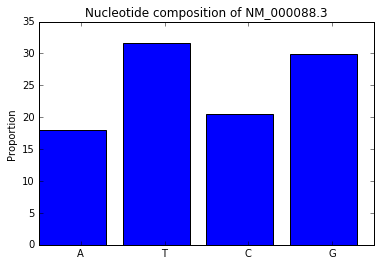

In [9]:
import matplotlib.pyplot as plt # import a set of code written for generating graphics and tell the computer how to display graphs
%pylab inline 

nucleotides = arange(4) # the x-axis has four positions, one for each of the four nucleotides
bar(nucleotides, propor) # chart will be a bar chart, containing nucleotides on the x-axis and count as percent of length of the sequence on the y-axis
xticks(nucleotides + 0.5,  ('A', 'T', 'C', 'G') ) # label the x-axis with the nucleotides in the same order as in the counts list
title("Nucleotide composition of " + ntid) #add a title to the graph
ylabel("Proportion") #label the y-axis
show()

Next test if the nucleotide composition of your gene differs significantly from the expected equal representation of nucleotides using the chi-square test. Remember that the chi-square test statistic is the sum over all values (here each of the four nucleotides) of the difference between the number of times that nucleotide occurs within your sequence ("the observed") and the number of times you would expect to see that nucleotide if the nucleotides occur with equal frequencies ("the expected"), squared, divided by the expected. The smaller the difference between the observed and the expected, the smaller the test statistic will be and the less support you have for rejecting the null hypothesis that the observed and expected data come from the same distribution, i.e. are equally distributed. Assuming that the null hypothesis is true, the p-value represents the probability of finding a test statistic equal to or greater than your test statistic by chance. A p-value of 0.05 or less is the generally accepted standard for significance in scientific publications. Where the p-value is less than 0.05 we reject the null hypothesis; if the p-value is greater than 0.05 we fail to reject the null hypothesis. An excellent video reviewing the concept can be found here - http://youtu.be/HwD7ekD5l0g (ignore the part using the statistical software "R").

In [10]:
from scipy import stats # import a set of code written for computing statistical tests

def chi_calcs(sequence, counts): # define a function named chi_calcs for performing a chi-squared test on the nucleotide frequency within a sequence
    expfreq = [int(round(0.25*len(sequence),0)), int(round(0.25*len(sequence),0)), int(round(0.25*len(sequence),0)), int(round(0.25*len(sequence),0))] # the expected number of each nucleotide in a sequence the length of your sequence at equal frequency 
    print "Expected number of nucleotides: ", expfreq # print out the list containing the expected frequency of each nucleotide
    obsfreq = counts # assign the observed frequency of each nucleotide in the list counts to the variable named obsfreq
    print "Observed number of nucleotides: ", obsfreq # print out the list containing the observed frequency of each nucleotide
    assert len(expfreq) == len(obsfreq) # assert that the number of items in the two lists are the equal

    chi2, pval = stats.chisquare(obsfreq, expfreq) # calculates the chi2 test statistic (chi2) and the p-value (pval) using the observed and expected frequency lists
    print "Chi-squared test statistic: ", chi2 # print the value of the chi-square test statistic
    print "p-value: ", pval # print the p-value
chi_calcs(ntseq, counts)
# assign the value of the variable ntseq to the variable sequence
# send the arguments sequence and observed frequencies of nucleotides to the function chi_calcs

Expected number of nucleotides:  [1482, 1482, 1482, 1482]
Observed number of nucleotides:  [1064, 1217, 1877, 1769]
Chi-squared test statistic:  326.142375169
p-value:  2.18299273447e-70


#### Q3: Considering your mRNA sequence as a whole, are the four nucleotides present in equal frequencies?

As we've seen, the nucleotide content of a gene can differ significantly over the length of an mRNA sequence. Using the fasta files you generated last week, calculate the nucleotide content over the 5'UTR, CDS, and 3'UTR regions of your gene.

We'll use Biopython's SeqIO module to parse the fasta files into their header's and sequence's.


In [11]:
from Bio import SeqIO

five_UTR_filename = ntid + "_5UTR_seq.fasta" # the file where you saved your gene's 5'UTR sequence
CDS_filename = ntid + "_CDS_seq.fasta" # the file where you saved your gene's CDS
three_UTR_filename = ntid + "_3UTR_seq.fasta" # the file where you saved your gene's 3'UTR sequence

gene_regions = {} # create a dictionary called gene_regions
fasta_list = [five_UTR_filename, CDS_filename, three_UTR_filename] # put the file names into a list

for fl in fasta_list: # for each file, fl, in the list, fasta_list
    for s in SeqIO.parse(fl, "fasta"): # for each fasta record, s, in the file, fl, parse the fasta records (separates the text into the fasta header and sequence)
        print s.id # print the fasta header of the fasta record
        print s.seq # print the sequence contained in the fasta record
        print len(s.seq)
        gene_regions[s.id] = s.seq
        print "\n"
print gene_regions.keys()
print gene_regions.values()
for j in gene_regions.values():
    print len(j)
        
        # convert the sequence to a string
        # add an element to the dictionary, gene_regions, where the key is the fasta header and the value is the string of the sequence
        # print the length of the fasta sequence
        # print a newline to create a visual separation between the sequences

NM_000088.3_5UTR
TCGTCGGAGCAGACGGGAGTTTCTCCTCGGGGTCGGAGCAGGAGGCACGCGGAGTGTGAGGCCACGCATGAGCGGACGCTAACCCCCTCCCCAGCCACAAAGAGTCTACATGTCTAGGGTCTAGAC
126


NM_000088.3_CDS
ATGTTCAGCTTTGTGGACCTCCGGCTCCTGCTCCTCTTAGCGGCCACCGCCCTCCTGACGCACGGCCAAGAGGAAGGCCAAGTCGAGGGCCAAGACGAAGACATCCCACCAATCACCTGCGTACAGAACGGCCTCAGGTACCATGACCGAGACGTGTGGAAACCCGAGCCCTGCCGGATCTGCGTCTGCGACAACGGCAAGGTGTTGTGCGATGACGTGATCTGTGACGAGACCAAGAACTGCCCCGGCGCCGAAGTCCCCGAGGGCGAGTGCTGTCCCGTCTGCCCCGACGGCTCAGAGTCACCCACCGACCAAGAAACCACCGGCGTCGAGGGACCCAAGGGAGACACTGGCCCCCGAGGCCCAAGGGGACCCGCAGGCCCCCCTGGCCGAGATGGCATCCCTGGACAGCCTGGACTTCCCGGACCCCCCGGACCCCCCGGACCTCCCGGACCCCCTGGCCTCGGAGGAAACTTTGCTCCCCAGCTGTCTTATGGCTATGATGAGAAATCAACCGGAGGAATTTCCGTGCCTGGCCCCATGGGTCCCTCTGGTCCTCGTGGTCTCCCTGGCCCCCCTGGTGCACCTGGTCCCCAAGGCTTCCAAGGTCCCCCTGGTGAGCCTGGCGAGCCTGGAGCTTCAGGTCCCATGGGTCCCCGAGGTCCCCCAGGTCCCCCTGGAAAGAATGGAGATGATGGGGAAGCTGGAAAACCTGGTCGTCCTGGTGAGCGTGGGCCTCCTGGGCCTCAGGGTGCTCGAGGATTGCCCGGAACAGCTGGCCTCCCTGGAATGAAGGGACACAGAGGTTTCAGTGGTTTGGATGGTGCCAAGGGA

For each sequence in the dictionary gene_regions, call the GC_content function. Remember that GC_content returns a list of the counts of each nucleotide in the sequence. Call the chi_calcs function, giving it the sequence and the list of counts - this will print out the observed and expected number of nucleotides, the chi-squared test statistic, and corresponding p-value.

In [12]:
keys = gene_regions.viewkeys()
value = gene_regions.viewvalues()
print keys
print value
print "\n"
for j in value:
    countA=0 
    countC=0
    countG=0
    countT=0
    countN=0 
    for k in j:
        if k == "C": 
            countC +=1 
        elif k == "A": # ask if the nt is adenosine
            countA +=1 # increase countA by one
        elif k == "T": # ask if the nt is thymine
            countT +=1 # increase countT by one
        elif k == "G": # ask if the nt is guanine
            countG +=1 # increase countG by one
        else: # if above not True then nt is not a standard nucleotide
            countN +=1 # increase countN by one
            print "Non-standard nt", nt # print a warning message
    counts = [countA, countT, countC, countG]
    print "countA", countA # print the values of the count variables
    print "countC", countC
    print "countG", countG
    print "countT", countT
    print "countN", countN
    # generate a list containing the number of A, T, C, and G in the sequence.
    print counts # return the list counts
    chi_calcs(j,counts)
    print "\n"
    
# for each element of the dictionary gene_regions
    # print the dictionary key, the sequence id
    # assign the nucleotide seq to a variable called sequence
    # print a message with the number of nucleotides in the sequence
    #counts = GC_content(sequence) # send the sequence to the function GC_content, returns a list called counts containing the counts of each nucleotide  
    #chi_calcs(sequence, counts) # send the sequence and list counts to the function chi_calcs, this will print out the expected and observed nucletides, the chi-square statistic and the p-value
    # print a newline as a visual separation between records


dict_keys(['NM_000088.3_3UTR', 'NM_000088.3_CDS', 'NM_000088.3_5UTR'])
dict_values([Seq('ACTCCCTCCATCCCAACCTGGCTCCCTCCCACCCAACCAACTTTCCCCCCAACC...TAA', SingleLetterAlphabet()), Seq('ATGTTCAGCTTTGTGGACCTCCGGCTCCTGCTCCTCTTAGCGGCCACCGCCCTC...TAA', SingleLetterAlphabet()), Seq('TCGTCGGAGCAGACGGGAGTTTCTCCTCGGGGTCGGAGCAGGAGGCACGCGGAG...GAC', SingleLetterAlphabet())])


countA 334
countC 404
countG 304
countT 364
countN 0
[334, 364, 404, 304]
Expected number of nucleotides:  [352, 352, 352, 352]
Observed number of nucleotides:  [334, 364, 404, 304]
Chi-squared test statistic:  15.5568181818
p-value:  0.00139765242955


countA 703
countC 1436
countG 1423
countT 833
countN 0
[703, 833, 1436, 1423]
Expected number of nucleotides:  [1099, 1099, 1099, 1099]
Observed number of nucleotides:  [703, 833, 1436, 1423]
Chi-squared test statistic:  405.929936306
p-value:  1.1499153285e-87


countA 27
countC 37
countG 42
countT 20
countN 0
[27, 20, 37, 42]
Expected number of nucleotides:  [32, 32, 32, 32]


#### Q4: Can you reject the null hypothesis of equal distribution of nucleotides for any of the regions of your gene? Explain. If you reject the null hypothesis, which nucletides appear to be over or under represented?

Now, let's generate a graph showing the percent GC of 50 nt bins accross your gene's entire mRNA sequence.

In [26]:
[x0, x1, x2] = value
print len(ntseq)
print ntseq

5927
TCGTCGGAGCAGACGGGAGTTTCTCCTCGGGGTCGGAGCAGGAGGCACGCGGAGTGTGAGGCCACGCATGAGCGGACGCTAACCCCCTCCCCAGCCACAAAGAGTCTACATGTCTAGGGTCTAGACATGTTCAGCTTTGTGGACCTCCGGCTCCTGCTCCTCTTAGCGGCCACCGCCCTCCTGACGCACGGCCAAGAGGAAGGCCAAGTCGAGGGCCAAGACGAAGACATCCCACCAATCACCTGCGTACAGAACGGCCTCAGGTACCATGACCGAGACGTGTGGAAACCCGAGCCCTGCCGGATCTGCGTCTGCGACAACGGCAAGGTGTTGTGCGATGACGTGATCTGTGACGAGACCAAGAACTGCCCCGGCGCCGAAGTCCCCGAGGGCGAGTGCTGTCCCGTCTGCCCCGACGGCTCAGAGTCACCCACCGACCAAGAAACCACCGGCGTCGAGGGACCCAAGGGAGACACTGGCCCCCGAGGCCCAAGGGGACCCGCAGGCCCCCCTGGCCGAGATGGCATCCCTGGACAGCCTGGACTTCCCGGACCCCCCGGACCCCCCGGACCTCCCGGACCCCCTGGCCTCGGAGGAAACTTTGCTCCCCAGCTGTCTTATGGCTATGATGAGAAATCAACCGGAGGAATTTCCGTGCCTGGCCCCATGGGTCCCTCTGGTCCTCGTGGTCTCCCTGGCCCCCCTGGTGCACCTGGTCCCCAAGGCTTCCAAGGTCCCCCTGGTGAGCCTGGCGAGCCTGGAGCTTCAGGTCCCATGGGTCCCCGAGGTCCCCCAGGTCCCCCTGGAAAGAATGGAGATGATGGGGAAGCTGGAAAACCTGGTCGTCCTGGTGAGCGTGGGCCTCCTGGGCCTCAGGGTGCTCGAGGATTGCCCGGAACAGCTGGCCTCCCTGGAATGAAGGGACACAGAGGTTTCAGTGGTTTGGATGGTGCCAAGGGAGATGCTGGTCCTGCTGGTCCTAAGGGTGAGCCTGG

In [107]:

#break into size 50 chunks
region = {}
for i in range(0,len(ntseq)/50):
    subset = ntseq[i*50:(i+1)*50]
    region[i] = subset 
region[i+1] = ntseq[(i+1)*50:]
regionGC = {}
Y = 0
gcnum = 0
for i in region:
    Y += 1
    gcnum = 0
    for x in ntseq[(i*50):(i+1)*50]:
        if x in "G":
            gcnum += 1
        if x in "C":
            gcnum += 1
    gcpercent = (float(gcnum)/50)*100
    regionGC[Y] = gcpercent
print regionGC

{1: 68.0, 2: 66.0, 3: 50.0, 4: 68.0, 5: 57.99999999999999, 6: 62.0, 7: 57.99999999999999, 8: 68.0, 9: 66.0, 10: 74.0, 11: 72.0, 12: 78.0, 13: 46.0, 14: 70.0, 15: 68.0, 16: 72.0, 17: 54.0, 18: 68.0, 19: 56.00000000000001, 20: 64.0, 21: 64.0, 22: 66.0, 23: 76.0, 24: 60.0, 25: 74.0, 26: 68.0, 27: 56.00000000000001, 28: 80.0, 29: 64.0, 30: 56.00000000000001, 31: 66.0, 32: 74.0, 33: 66.0, 34: 62.0, 35: 64.0, 36: 68.0, 37: 76.0, 38: 57.99999999999999, 39: 72.0, 40: 68.0, 41: 68.0, 42: 62.0, 43: 68.0, 44: 64.0, 45: 70.0, 46: 72.0, 47: 60.0, 48: 60.0, 49: 64.0, 50: 66.0, 51: 74.0, 52: 72.0, 53: 57.99999999999999, 54: 68.0, 55: 70.0, 56: 64.0, 57: 66.0, 58: 68.0, 59: 66.0, 60: 62.0, 61: 64.0, 62: 60.0, 63: 70.0, 64: 66.0, 65: 70.0, 66: 74.0, 67: 64.0, 68: 80.0, 69: 60.0, 70: 72.0, 71: 64.0, 72: 62.0, 73: 72.0, 74: 72.0, 75: 60.0, 76: 60.0, 77: 62.0, 78: 70.0, 79: 54.0, 80: 52.0, 81: 62.0, 82: 50.0, 83: 60.0, 84: 66.0, 85: 60.0, 86: 60.0, 87: 64.0, 88: 64.0, 89: 50.0, 90: 62.0, 91: 62.0, 92: 54.

5927
5927


AttributeError: 'int' object has no attribute 'seq'

We'd like to plot the GC content by region over the length with the coding region of your gene highlighted. To do this we first need to know the begining and ending position of the coding region. Write a for loop using the features attribute of nt_seq_record; if the feature type is "CDS", assign the starting position to cds_start and the ending position to cds_end.

In [145]:
GI_id = "NM_000088.3"
Entrez.email = "Andrew.JudellHalf001@umb.edu" # let NCBI know who you are
handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id=GI_id) # db = database to query, rettype = retrieval type, retmode = retrieval mode 
seq_record = SeqIO.read(handle, "gb") #read the contents "fetched" from NCBI
print seq_record
print type(seq_record)
handle.close()
x = 0
for f in seq_record.features: 
    x += 1
    if f.type == "CDS":
        cds_start = f.location.start
        cds_end = f.location.end
        regionplot =ntseq[cds_start:cds_end]
# for each feature in this record's features, using the .features attribute of nt_seq_record
    # ask if the feature is a CDS, using the .type attribute of the feature
        # if so, assign the start location to the variable cds_start, using the .location.start attribute of the feature
        # if so, assign the end location to the variable cds_end, using the .location.end attribute of the feature
# print the value of cds_start
# print the value of cds_end
print cds_start
print cds_end
print regionplot

ID: NM_000088.3
Name: NM_000088
Description: Homo sapiens collagen, type I, alpha 1 (COL1A1), mRNA.
Number of features: 89
/comment=REVIEWED REFSEQ: This record has been curated by NCBI staff. The
reference sequence was derived from AC015909.14 and Z74615.1.
This sequence is a reference standard in the RefSeqGene project.
On Jul 14, 2006 this sequence version replaced gi:14719826.
Summary: This gene encodes the pro-alpha1 chains of type I collagen
whose triple helix comprises two alpha1 chains and one alpha2
chain. Type I is a fibril-forming collagen found in most connective
tissues and is abundant in bone, cornea, dermis and tendon.
Mutations in this gene are associated with osteogenesis imperfecta
types I-IV, Ehlers-Danlos syndrome type VIIA, Ehlers-Danlos
syndrome Classical type, Caffey Disease and idiopathic
osteoporosis. Reciprocal translocations between chromosomes 17 and
22, where this gene and the gene for platelet-derived growth factor
beta are located, are associated with a p

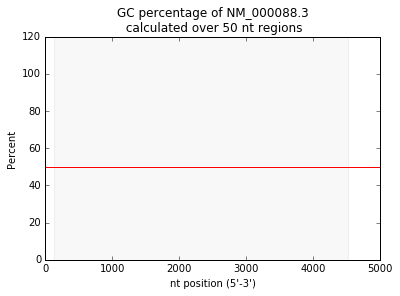

In [149]:
import matplotlib.pyplot as plt # import a set of code written for generating graphics and tell the computer how to display graphs
#%pylab inline

plt.plot(Y) # plot the values of region
plt.axhline(0, color='black') # forces the y-axis to start at 0
plt.axhline(50, color='red') # add a red line representing the average GC content of the entire sequence

plt.axvspan(cds_start, cds_end, facecolor='grey', alpha=0.05) # create a grey region corresponding to the coding region
plt.ylabel("Percent") # label the y-axis
plt.xlabel("nt position (5'-3')") # label the x-axis
plt.title("GC percentage of " + ntid + "\n calculated over 50 nt regions") # add a title
plt.show()

#### Q5: Are there noticeable differences in the GC content between the different regions of the mRNA sequence? Explain.

In [ ]:
%matplotlib inline 
import numpy as np #linear algebra/vector/matrix tool
import matplotlib.pyplot as plt #plot tool

x = np.random.randn(100,1) #length 100 normal random variable vector
y = x**2 #square each element of x
plt.scatter(x,y)

That's all folks!  
Please save your notebook and upload the notebook to Blackboard.